<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load data
data = pd.read_csv('/content/mobile_price_classification.csv')

# Separate features and labels
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [3]:
# Building basic ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2499 - loss: 1.4590 - val_accuracy: 0.4125 - val_loss: 1.2944
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4346 - loss: 1.2364 - val_accuracy: 0.5219 - val_loss: 1.1323
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6217 - loss: 1.0278 - val_accuracy: 0.6156 - val_loss: 0.9312
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7025 - loss: 0.8297 - val_accuracy: 0.7000 - val_loss: 0.7511
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8020 - loss: 0.6409 - val_accuracy: 0.7594 - val_loss: 0.6121
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8439 - loss: 0.5099 - val_accuracy: 0.8094 - val_loss: 0.5140
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8796 - loss: 0.4291 - val_accuracy: 0.8562 - val_loss: 0.4389
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9286 - loss: 0.3472 - val_accuracy: 0.8844 - val_loss

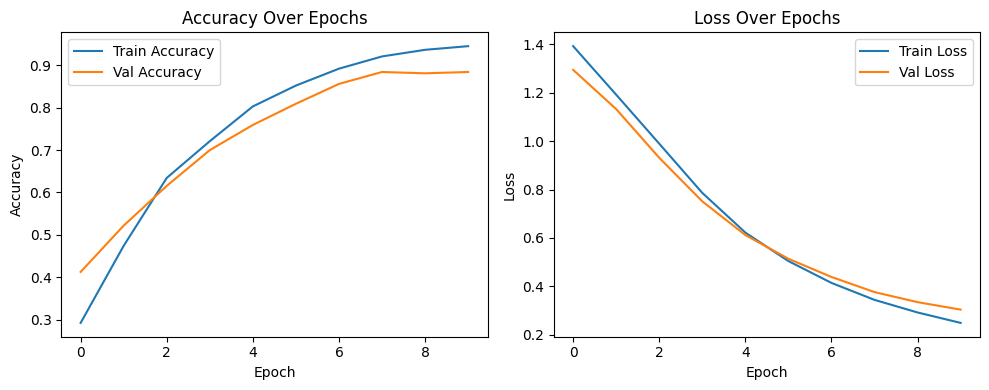

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# Step 7: Evaluate the Model on Test Data

test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.2668  
Test Accuracy: 0.91


In [6]:
# Evaluate
error = model.evaluate(X_test, y_test_cat)
print(f"Test Error: {error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.2668 
Test Error: [0.28652164340019226, 0.9075000286102295]


In [7]:
# predict the model
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted Labels: tf.Tensor(
[0 2 1 3 1 1 2 0 3 1 0 0 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 3 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 3 2 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 3 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 2 3 2 3 3 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 3 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 0 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 2 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 1 3 1 0 1 2 3 0 2 3 3 3 0 3 1 3 3 3 2 1 0 3 3 1 3 3 3
 2 3 0 2 2 3 2 2 0 2 3 2 3 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 2 1 0 0 0 2 2 3 1 0 2 0 2 2 3 0 2
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 2 1 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2], shape=(400,), dtype=int64)
